## Observations and Insights 

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import scipy.stats as st
import numpy as np
import seaborn as sns
import gmaps

# Study data files
#athlete_events_path = "data_set/athlete_events.csv"
olympic_medals_path = "data_set/olympic_medals.csv"
Countrys_GDP_path = "data_set/Country_wise_GDP_from_1994_to_2017.csv"

# Read the olympics data and the study results
medals_Year = []
#athlete_events = pd.read_csv(athlete_events_path)
olympic_medals = pd.read_csv(olympic_medals_path)
Countrys_GDP = pd.read_csv(Countrys_GDP_path)
medals_Year = olympic_medals['slug_game'].str[-4:]
olympic_medals['medals_Year'] = medals_Year.astype('int64')
# Concatinate athletes name in olympic medals file to come up with full name that can be used to merge with athlete_events file 

olympic_medals

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,country_name,country_code,country_tri_letter_code,medals_Year
0,0,Skeleton,pyeongchang-2018,Women,Women,GOLD,Athlete,NaN,Lizzy,YARNOLD,Great Britain,GB,GBR,2018
1,1,Skeleton,pyeongchang-2018,Women,Women,SILVER,Athlete,NaN,Jacqueline,LOELLING,Germany,DE,GER,2018
2,2,Skeleton,pyeongchang-2018,Women,Women,BRONZE,Athlete,NaN,Laura,DEAS,Great Britain,GB,GBR,2018
3,3,Skeleton,pyeongchang-2018,Men,Men,GOLD,Athlete,NaN,Sungbin,YUN,Republic of Korea,KR,KOR,2018
4,4,Skeleton,pyeongchang-2018,Men,Men,SILVER,Athlete,NaN,Nikita,TREGUBOV,Russia,NaN,OAR,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20137,20137,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,Viggo,JENSEN,Denmark,DK,DEN,1896
20138,20138,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,Alexandros,Nikolopoulos,Greece,GR,GRE,1896
20139,20139,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,Viggo,JENSEN,Denmark,DK,DEN,1896
20140,20140,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,Launceston,ELLIOT,Great Britain,GB,GBR,1896


In [2]:
diff_cols = Countrys_GDP.columns.difference(olympic_medals.columns)

In [3]:
diff_cols

Index(['Country', 'GDP (in USD)', 'GDP Real (in USD)', 'GDP change (%)',
       'GDP per capita (in USD)', 'Pop. change (%)', 'Population', 'Year'],
      dtype='object')

In [4]:
Countrys_GDP["Country"].unique()

array(['United States of America', "People's Republic of China", 'Japan',
       'Germany', 'India', 'Great Britain', 'France', 'Brazil', 'Italy',
       'Canada', 'Russia', 'Republic of Korea', 'Australia', 'Spain',
       'Mexico', 'Indonesia', 'Turkey', 'Netherlands', 'Saudi Arabia',
       'Switzerland', 'Argentina', 'Sweden', 'Poland', 'Belgium',
       'Thailand', 'Iran', 'Austria', 'Norway', 'United Arab Emirates',
       'Nigeria', 'Israel', 'South Africa', 'Hong Kong', 'Ireland',
       'Denmark', 'Singapore', 'Malaysia', 'Colombia', 'Philippines',
       'Pakistan', 'Chile', 'Finland', 'Bangladesh', 'Egypt', 'Vietnam',
       'Portugal', 'Czech Republic (Czechia)', 'Romania', 'Peru',
       'New Zealand', 'Greece', 'Iraq', 'Algeria', 'Qatar', 'Kazakhstan',
       'Hungary', 'Angola', 'Kuwait', 'Sudan', 'Ukraine', 'Morocco',
       'Ecuador', 'Cuba', 'Slovakia', 'Sri Lanka', 'Ethiopia', 'Kenya',
       'Dominican Republic', 'Guatemala', 'Oman', 'Myanmar', 'Luxembourg',
       

In [5]:
olympic_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20142 entries, 0 to 20141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               20142 non-null  int64 
 1   discipline_title         20142 non-null  object
 2   slug_game                20142 non-null  object
 3   event_title              20142 non-null  object
 4   event_gender             20142 non-null  object
 5   medal_type               20142 non-null  object
 6   participant_type         20142 non-null  object
 7   participant_title        6060 non-null   object
 8   athlete_name             16762 non-null  object
 9   athlete_surname          16762 non-null  object
 10  country_name             20142 non-null  object
 11  country_code             18623 non-null  object
 12  country_tri_letter_code  20142 non-null  object
 13  medals_Year              20142 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 

In [6]:
listTwo = set(olympic_medals["country_name"].unique())

In [7]:
Countrys_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4326 non-null   int64  
 1   Country                  4326 non-null   object 
 2   GDP (in USD)             4326 non-null   int64  
 3   GDP Real (in USD)        4326 non-null   int64  
 4   GDP change (%)           4326 non-null   float64
 5   GDP per capita (in USD)  4326 non-null   int64  
 6   Pop. change (%)          4326 non-null   float64
 7   Population               4326 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 270.5+ KB


In [8]:
list_one = set(Countrys_GDP["Country"].unique())

In [9]:
# check country lists for differences

list_one = set(Countrys_GDP["Country"].unique())
list_two = set(olympic_medals["country_name"].unique())
list_df = pd.DataFrame(list(list_two - list_one))

In [10]:
# list_df

In [11]:
#Filter out the columns that are different. You could pass in the df2[diff_cols] directly into the merge as well.
Diff_GDP_columns = Countrys_GDP[diff_cols]

#Merge the DataFrames
df_merged = pd.merge(olympic_medals, Diff_GDP_columns, right_on=['Country','Year'],left_on=['country_name','medals_Year'], how='inner')

In [12]:
df_merged

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_name,athlete_surname,...,country_tri_letter_code,medals_Year,Country,GDP (in USD),GDP Real (in USD),GDP change (%),GDP per capita (in USD),Pop. change (%),Population,Year
0,331,Cycling BMX,rio-2016,Individual women,Women,GOLD,Athlete,NaN,Mariana,PAJON,...,COL,2016,Colombia,282856000000,366906000000,1.96,7616,1.38,48175052,2016
1,336,Cycling BMX,rio-2016,Individual men,Men,BRONZE,Athlete,NaN,Carlos Alberto,RAMIREZ YEPES,...,COL,2016,Colombia,282856000000,366906000000,1.96,7616,1.38,48175052,2016
2,556,Athletics,rio-2016,triple jump women,Women,GOLD,Athlete,NaN,Caterine,IBARGUEN,...,COL,2016,Colombia,282856000000,366906000000,1.96,7616,1.38,48175052,2016
3,658,Weightlifting,rio-2016,62kg featherweight men,Men,GOLD,Athlete,NaN,Oscar,FIGUEROA,...,COL,2016,Colombia,282856000000,366906000000,1.96,7616,1.38,48175052,2016
4,675,Weightlifting,rio-2016,69kg men,Men,BRONZE,Athlete,NaN,Luis Javier,MOSQUERA LOZANO,...,COL,2016,Colombia,282856000000,366906000000,1.96,7616,1.38,48175052,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,7899,Figure skating,lillehammer-1994,Ice dancing mixed,Mixed,BRONZE,GameTeam,Great Britain team,Christopher,DEAN,...,GBR,1994,Great Britain,1140490000000,1736820000000,3.88,30068,0.28,57763378,1994
7408,7872,Short Track Speed Skating,lillehammer-1994,5000m relay men,Men,BRONZE,GameTeam,Australia team,NaN,NaN,...,AUS,1994,Australia,322201000000,663035000000,3.98,37252,1.11,17798529,1994
7409,7934,Cross Country Skiing,lillehammer-1994,Combined 10km 15km pursuit men,Men,SILVER,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,21250839258,64407663403,-12.60,4020,-0.98,16022222,1994
7410,7942,Cross Country Skiing,lillehammer-1994,50km men,Men,GOLD,Athlete,NaN,Vladimir,SMIRNOV,...,KAZ,1994,Kazakhstan,21250839258,64407663403,-12.60,4020,-0.98,16022222,1994


In [13]:
df_merged["Country"].value_counts()

United States of America      832
Russia                        591
People's Republic of China    571
Germany                       524
Australia                     314
                             ... 
Sudan                           1
Montenegro                      1
Zambia                          1
Barbados                        1
Paraguay                        1
Name: Country, Length: 108, dtype: int64

In [14]:
df_merged.groupby(["Country", "Year", "medal_type"]).count()

Unnamed: 0  discipline_title  slug_game  \
Country     Year medal_type                                            
Afghanistan 2008 BRONZE               1                 1          1   
            2012 BRONZE               1                 1          1   
Algeria     1996 BRONZE               1                 1          1   
                 GOLD                 2                 2          2   
            2000 BRONZE               3                 3          3   
...                                 ...               ...        ...   
Zimbabwe    2004 BRONZE               1                 1          1   
                 GOLD                 1                 1          1   
                 SILVER               1                 1          1   
            2008 GOLD                 1                 1          1   
                 SILVER               3                 3          3   

                             event_title  event_gender  participant_type  \
Country     Year medal_type                                                
Afghanistan 2008 BRONZE                1             1                 1   
            2012 BRONZE                1             1                 1   
Algeria     1996 BRONZE                1             1                 1   
                 GOLD                  2             2                 2   
            2000 BRONZE                3             3                 3   
...                                  ...           ...               ...   
Zimbabwe    2004 BRONZE                1             1                 1   
                 GOLD                  1             1                 1   
                 SILVER                1             1                 1   
            2008 GOLD                  1             1                 1   
                 SILVER                3             3                 3   

                             participant_title  athlete_name  athlete_surname  \
Country     Year medal_type                                                     
Afghanistan 2008 BRONZE                      0             1                1   
            2012 BRONZE                      0             1                1   
Algeria     1996 BRONZE                      0             1                1   
                 GOLD                        0             2                2   
            2000 BRONZE                      0             3                3   
...                                        ...           ...              ...   
Zimbabwe    2004 BRONZE                      0             1                1   
                 GOLD                        0             1                1   
                 SILVER                      0             1                1   
            2008 GOLD                        0             1                1   
                 SILVER                      0             3                3   

                             country_name  country_code  \
Country     Year medal_type                               
Afghanistan 2008 BRONZE                 1             1   
            2012 BRONZE                 1             1   
Algeria     1996 BRONZE                 1             1   
                 GOLD                   2             2   
            2000 BRONZE                 3             3   
...                                   ...           ...   
Zimbabwe    2004 BRONZE                 1             1   
                 GOLD                   1             1   
                 SILVER                 1             1   
            2008 GOLD                   1             1   
                 SILVER                 3             3   

                             country_tri_letter_code  medals_Year  \
Country     Year medal_type                                         
Afghanistan 2008 BRONZE                            1            1   
            2012 BRONZE                            1            1   
Alger

In [15]:
df_dv1 = df_merged[["Country", "Year", "medal_type"]]
df_dv1

,Country,Year,medal_type
0,Colombia,2016,GOLD
1,Colombia,2016,BRONZE
2,Colombia,2016,GOLD
3,Colombia,2016,GOLD
4,Colombia,2016,BRONZE
...,...,...,...
7407,Great Britain,1994,BRONZE
7408,Australia,1994,BRONZE
7409,Kazakhstan,1994,SILVER
7410,Kazakhstan,1994,GOLD


In [16]:
df_dv1.groupby(["Country", "Year"]).count()

medal_type
Country     Year            
Afghanistan 2008           1
            2012           1
Algeria     1996           3
            2000           5
            2008           2
...                      ...
Vietnam     2008           1
            2016           2
Zambia      1996           1
Zimbabwe    2004           3
            2008           4

[577 rows x 1 columns]

In [17]:
df_dv1_1 = pd.DataFrame(df_dv1.groupby(["Country", "Year"]).count())

In [18]:
# Total medals for each country / year
df_dv1_1.groupby(["Country", "Year"]).sum().sort_values(by='medal_type', ascending=False)

medal_type
Country                    Year            
United States of America   2016         127
People's Republic of China 2008         117
United States of America   2008         116
                           2012         112
                           1996         106
...                                     ...
Ecuador                    2008           1
Slovakia                   2014           1
Kazakhstan                 2014           1
Panama                     2008           1
Afghanistan                2008           1

[577 rows x 1 columns]

In [19]:
df_dv1_1.sort_values(by='medal_type', ascending=False).head(10)

medal_type
Country                    Year            
United States of America   2016         127
People's Republic of China 2008         117
United States of America   2008         116
                           2012         112
                           1996         106
                           2004         106
People's Republic of China 2012         104
United States of America   2000         102
Russia                     2004          95
                           2000          93

In [20]:
df_dv2 = df_merged[["Country", "Year", "medal_type", "slug_game"]]
df_dv2

,Country,Year,medal_type,slug_game
0,Colombia,2016,GOLD,rio-2016
1,Colombia,2016,BRONZE,rio-2016
2,Colombia,2016,GOLD,rio-2016
3,Colombia,2016,GOLD,rio-2016
4,Colombia,2016,BRONZE,rio-2016
...,...,...,...,...
7407,Great Britain,1994,BRONZE,lillehammer-1994
7408,Australia,1994,BRONZE,lillehammer-1994
7409,Kazakhstan,1994,SILVER,lillehammer-1994
7410,Kazakhstan,1994,GOLD,lillehammer-1994


In [21]:
df_dv2.groupby(["Country", "Year", "medal_type"]).count()

slug_game
Country     Year medal_type           
Afghanistan 2008 BRONZE              1
            2012 BRONZE              1
Algeria     1996 BRONZE              1
                 GOLD                2
            2000 BRONZE              3
...                                ...
Zimbabwe    2004 BRONZE              1
                 GOLD                1
                 SILVER              1
            2008 GOLD                1
                 SILVER              3

[1313 rows x 1 columns]

In [22]:
# Medal breakdown for country / year
df_dv2_1 = pd.DataFrame(df_dv2.groupby(["Country", "Year", "medal_type"]).count())

In [23]:
df_dv2_1

slug_game
Country     Year medal_type           
Afghanistan 2008 BRONZE              1
            2012 BRONZE              1
Algeria     1996 BRONZE              1
                 GOLD                2
            2000 BRONZE              3
...                                ...
Zimbabwe    2004 BRONZE              1
                 GOLD                1
                 SILVER              1
            2008 GOLD                1
                 SILVER              3

[1313 rows x 1 columns]

In [24]:
# df_dv2_1.unstack().plot(kind='bar')

In [25]:
df_dv2_1.sort_values(by='slug_game', ascending=False).head(10)

slug_game
Country                    Year medal_type           
People's Republic of China 2008 GOLD               55
United States of America   2012 GOLD               49
                           2016 GOLD               47
                           1996 GOLD               46
People's Republic of China 2012 GOLD               46
                           2004 GOLD               43
United States of America   2004 SILVER             40
                           2000 GOLD               40
                           2016 SILVER             40
                                BRONZE             40

In [26]:
data1 = df_dv1_1.loc[(slice(None), 2008), :].sort_values(by='medal_type', ascending=False).head(10)
data1

,,medal_type
Country,Year,
People's Republic of China,2008,117
United States of America,2008,116
Russia,2008,67
Great Britain,2008,56
Australia,2008,52
Germany,2008,49
France,2008,43
Republic of Korea,2008,35
Cuba,2008,30


In [27]:
df_dv2_1.loc["United States of America"]
bar_multi = df_dv2_1.loc["United States of America"]

<AxesSubplot:xlabel='Year'>

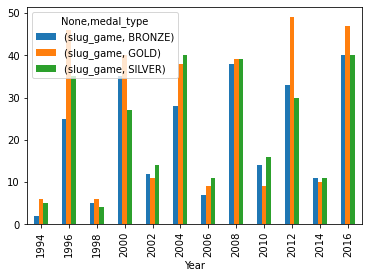

In [28]:
bar_multi.unstack().plot(kind='bar')

In [29]:
# # plot
# plt.figure(figsize=(7, 5))
# sns.barplot(x='Country', y='medal_type', data=data1)

In [30]:
df_dv2_1.loc[("Australia", 2008), :].sort_values(by='slug_game', ascending=False)

,slug_game
medal_type,
GOLD,18
BRONZE,17
SILVER,17


Text(0, 0.5, 'Medal Count')

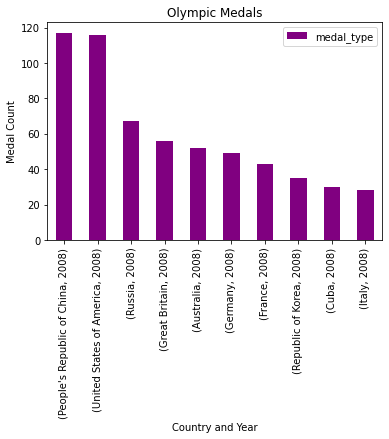

In [31]:
data1.plot(kind="bar", color=['purple']).legend(loc='upper right')

plt.title("Olympic Medals")
plt.xlabel("Country and Year")
plt.ylabel("Medal Count")

In [33]:
df_reg = df_merged[["Country", "Year", "medal_type"]]
df_reg.groupby(["Country", "Year"]).count()

medal_type
Country     Year            
Afghanistan 2008           1
            2012           1
Algeria     1996           3
            2000           5
            2008           2
...                      ...
Vietnam     2008           1
            2016           2
Zambia      1996           1
Zimbabwe    2004           3
            2008           4

[577 rows x 1 columns]

In [34]:
df_reg2 = df_merged[["Country", "Year", "Population"]]
df_reg2.groupby(["Country", "Year"]).head()

,Country,Year,Population
0,Colombia,2016,48175052
1,Colombia,2016,48175052
2,Colombia,2016,48175052
3,Colombia,2016,48175052
4,Colombia,2016,48175052
...,...,...,...
7407,Great Britain,1994,57763378
7408,Australia,1994,17798529
7409,Kazakhstan,1994,16022222
7410,Kazakhstan,1994,16022222


In [232]:
df_merged['Medal_Won'] = np.where(df_merged.loc[:,'medal_type']== 'na',0, 1)
events_medal_agg = df_merged.\
groupby(['Country','Year','Population'])[['Medal_Won']].\
agg('sum').reset_index()
events_medal_agg_sorted = events_medal_agg.sort_values(by='Medal_Won', ascending=False)
events_medal_agg_sorted.head(5)

,Country,Year,Population,Medal_Won
562,United States of America,2016,323015995,127
392,People's Republic of China,2008,1353569484,117
558,United States of America,2008,303486012,116
560,United States of America,2012,314043885,112
552,United States of America,1996,268335003,106


In [233]:
# less_pop = events_medal_agg.loc[(events_medal_agg['Population'] <= 900000000)]

In [234]:
# events_medal_agg_sorted = less_pop.sort_values(by='Medal_Won', ascending=False)

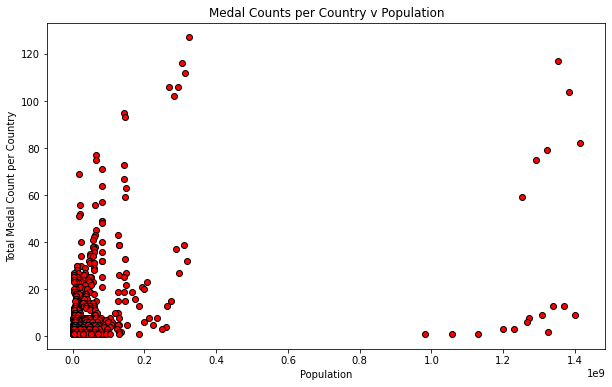

In [235]:
plt.figure(figsize=(10,6))
plt.title("Medal Counts per Country v Population")
plt.xlabel("Population")
plt.ylabel("Total Medal Count per Country")
plt.scatter(events_medal_agg_sorted["Population"], events_medal_agg_sorted["Medal_Won"], marker="o", facecolors="red", edgecolors="black")

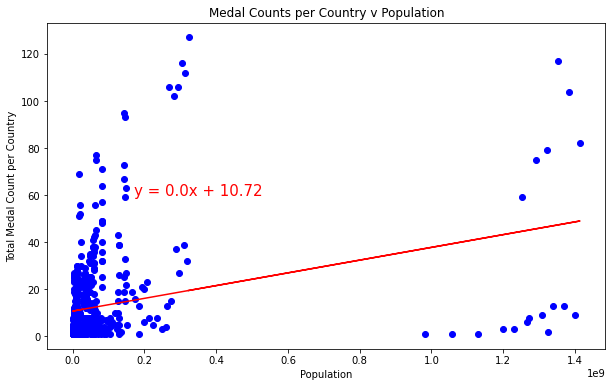

In [236]:
x_values = events_medal_agg_sorted["Population"]
y_values = events_medal_agg_sorted["Medal_Won"]

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(170000000,60),fontsize=15,color="red")
plt.title("Medal Counts per Country v Population")
plt.xlabel("Population")
plt.ylabel("Total Medal Count per Country")
plt.show()

In [37]:
df_merged['Medal_Won'] = np.where(df_merged.loc[:,'medal_type']== 'na',0, 1)
events_medal_agg2 = df_merged.\
groupby(['Country','Year','GDP Real (in USD)'])[['Medal_Won']].\
agg('sum').reset_index()
events_medal_agg_sorted2 = events_medal_agg2.sort_values(by='Medal_Won', ascending=False)
events_medal_agg_sorted2.head(5)

,Country,Year,GDP Real (in USD),Medal_Won
562,United States of America,2016,16972300000000,127
392,People's Republic of China,2008,5040350000000,117
558,United States of America,2008,15011500000000,116
560,United States of America,2012,15567000000000,112
552,United States of America,1996,10690000000000,106


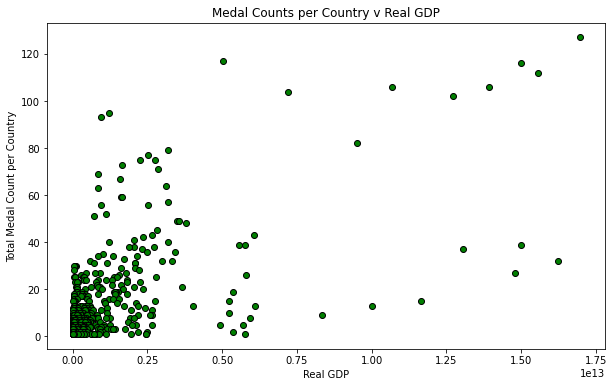

In [68]:
plt.figure(figsize=(10,6))
plt.title("Medal Counts per Country v Real GDP")
plt.xlabel("Real GDP")
plt.ylabel("Total Medal Count per Country")
plt.scatter(events_medal_agg_sorted2["GDP Real (in USD)"], events_medal_agg_sorted2["Medal_Won"], marker="o", facecolors="green", edgecolors="black")

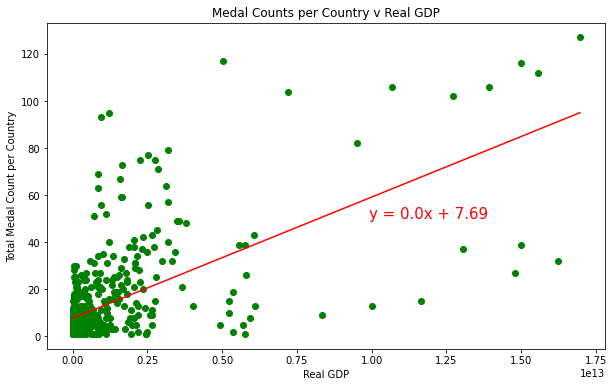

In [107]:
x_values = events_medal_agg_sorted2["GDP Real (in USD)"]
y_values = events_medal_agg_sorted2["Medal_Won"]

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9900000000000,50),fontsize=15,color="red")
plt.title("Medal Counts per Country v Real GDP")
plt.xlabel("Real GDP")
plt.ylabel("Total Medal Count per Country")
plt.show()

In [39]:
events_medal_agg_sorted.head(5)

,Country,Year,Population,Medal_Won
562,United States of America,2016,323015995,127
392,People's Republic of China,2008,1353569484,117
558,United States of America,2008,303486012,116
560,United States of America,2012,314043885,112
552,United States of America,1996,268335003,106


In [40]:
events_medal_agg_sorted2.head(5)

,Country,Year,GDP Real (in USD),Medal_Won
562,United States of America,2016,16972300000000,127
392,People's Republic of China,2008,5040350000000,117
558,United States of America,2008,15011500000000,116
560,United States of America,2012,15567000000000,112
552,United States of America,1996,10690000000000,106


In [41]:
# Gathering medals won by country per year from 1896-2018
olympic_medals['Medal_Won'] = np.where(olympic_medals.loc[:,'medal_type']== 'na',0, 1)

In [42]:
olympic_medals_agg = olympic_medals.\
groupby(['country_name','medals_Year'])[['Medal_Won']].\
agg('sum').reset_index()
olympic_medals_agg = olympic_medals_agg.sort_values(by='Medal_Won', ascending=False)

In [43]:
olympic_medals_agg.head(10)

,country_name,medals_Year,Medal_Won
1349,United States of America,1904,241
1111,Russia,1980,228
1366,United States of America,1984,189
492,Germany,1988,184
489,Germany,1976,176
1113,Russia,1988,172
490,Germany,1980,166
1110,Russia,1976,162
514,Great Britain,1908,160
1342,Unified Team,1992,141


In [44]:
# Selecting country's medals won per year
usa_medals = olympic_medals_agg.loc[olympic_medals_agg["country_name"] == "United States of America"]

In [45]:
usa_medals.sort_values(by='medals_Year', ascending=True).head()

,country_name,medals_Year,Medal_Won
1347,United States of America,1896,20
1348,United States of America,1900,48
1349,United States of America,1904,241
1350,United States of America,1908,47
1351,United States of America,1912,63


In [46]:
olympic_medals["event_gender"].unique()

array(['Women', 'Men', 'Mixed', 'Open'], dtype=object)

In [47]:
# Gathering medals won by country's gender per year from 1896-2018
gender_medals_agg = olympic_medals.\
groupby(['event_gender', 'country_name','medals_Year'])[['Medal_Won']].\
agg('sum').reset_index()
gender_medals_agg = gender_medals_agg.sort_values(by='Medal_Won', ascending=False)

In [48]:
gender_medals_agg

,event_gender,country_name,medals_Year,Medal_Won
1267,Men,United States of America,1904,234
1045,Men,Russia,1980,147
481,Men,Great Britain,1908,138
1047,Men,Russia,1988,118
1284,Men,United States of America,1984,106
...,...,...,...,...
1506,Open,Brazil,1984,1
602,Men,Islamic Republic of Iran,1948,1
1502,Open,Belgium,1988,1
1500,Open,Belgium,1960,1


In [49]:
men_medals = gender_medals_agg.loc[gender_medals_agg["event_gender"] == "Men"]

In [50]:
men_list = ["United States of America", "Russia", "Great Britain", "Germany", "France"]

In [51]:
men_medals2 = men_medals[men_medals["country_name"].isin(men_list)]

In [52]:
country = men_medals2.country_name
medals = men_medals2.Medal_Won

<AxesSubplot:xlabel='country_name', ylabel='Medal_Won'>

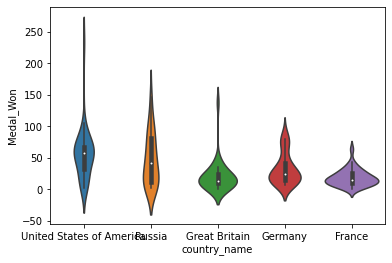

In [53]:
sns.violinplot(x=country, y=medals, data=men_medals2)

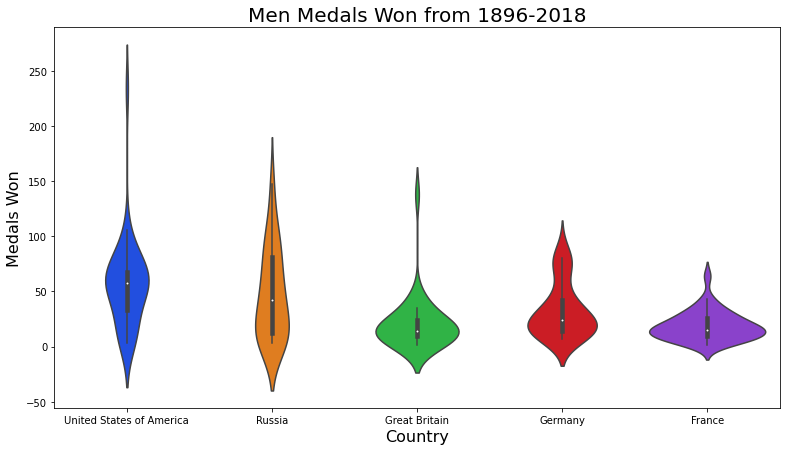

In [161]:
plt.figure(figsize=(13,7))
ax = sns.violinplot(x=country, y=medals, data=men_medals2, palette="bright")
ax.set_title("Men Medals Won from 1896-2018", fontsize = 20)
ax.set_ylabel("Medals Won", fontsize = 16)
ax.set_xlabel("Country", fontsize = 16)

plt.show()

In [55]:
gender_medals_agg["country_name"]

1267    United States of America
1045                      Russia
481                Great Britain
1047                      Russia
1284    United States of America
                  ...           
1506                      Brazil
602     Islamic Republic of Iran
1502                     Belgium
1500                     Belgium
0                    Afghanistan
Name: country_name, Length: 2598, dtype: object

In [129]:
gender_medals_agg.loc[gender_medals_agg["event_gender"] == "Women"].head(40)

,event_gender,country_name,medals_Year,Medal_Won
2069,Women,Germany,1988,81
2067,Women,Germany,1980,74
2066,Women,Germany,1976,68
2342,Women,People's Republic of China,2008,66
2569,Women,United States of America,1984,64
2581,Women,United States of America,2012,62
2583,Women,United States of America,2016,62
2344,Women,People's Republic of China,2012,61
2571,Women,United States of America,1992,57
2418,Women,Russia,1980,56


In [131]:
women_medals = gender_medals_agg.loc[gender_medals_agg["event_gender"] == "Women"]

In [144]:
women_list = ["Germany", "People's Republic of China", "United States of America", "Russia", "Romania"]

In [145]:
women_medals2 = women_medals[women_medals["country_name"].isin(women_list)]

In [146]:
country2 = women_medals2.country_name
medals2 = women_medals2.Medal_Won

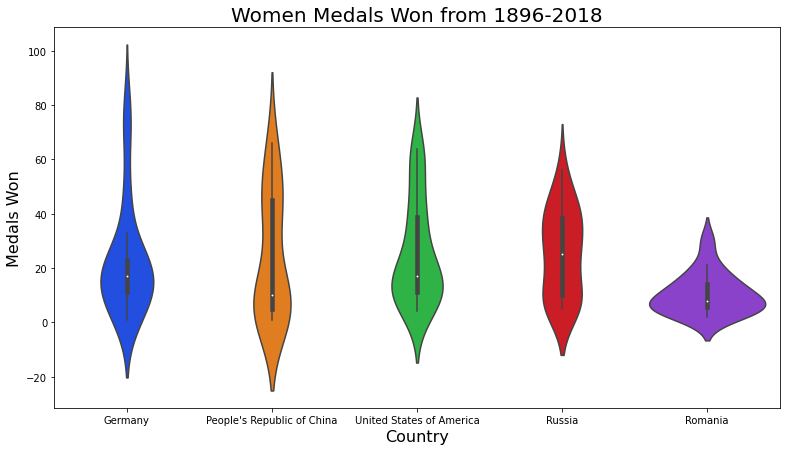

In [162]:
plt.figure(figsize=(13,7))
ax = sns.violinplot(x=country2, y=medals2, data=women_medals2, palette="bright")
ax.set_title("Women Medals Won from 1896-2018", fontsize = 20)
ax.set_ylabel("Medals Won", fontsize = 16)
ax.set_xlabel("Country", fontsize = 16)

plt.show()

In [57]:
gender_medals_agg.loc[gender_medals_agg["event_gender"] == "Mixed"]

,event_gender,country_name,medals_Year,Medal_Won
1437,Mixed,Russia,1980,8
1362,Mixed,Canada,2018,8
1438,Mixed,Russia,1984,8
1441,Mixed,Russia,1998,8
1445,Mixed,Russia,2014,8
...,...,...,...,...
1413,Mixed,Italy,2018,1
1412,Mixed,Italy,2014,1
1414,Mixed,Latvia,2014,1
1446,Mixed,Russia,2018,1


In [58]:
gender_medals_agg.loc[gender_medals_agg["event_gender"] == "Open"]

,event_gender,country_name,medals_Year,Medal_Won
1553,Open,France,1900,36
1579,Open,Germany,1976,26
1704,Open,Russia,1980,17
1764,Open,United States of America,1984,17
1578,Open,Germany,1972,17
...,...,...,...,...
1514,Open,Canada,1972,1
1513,Open,Canada,1968,1
1506,Open,Brazil,1984,1
1502,Open,Belgium,1988,1


In [59]:
# Gathering medals won by country's gender per year from 1994-2017
gender_medals_agg2 = df_merged.\
groupby(['event_gender', 'Country','Year', 'GDP Real (in USD)', 'Population'])[['Medal_Won']].\
agg('sum').reset_index()
gender_medals_agg2 = gender_medals_agg2.sort_values(by='Medal_Won', ascending=False)

In [60]:
gender_medals_agg2

,event_gender,Country,Year,GDP Real (in USD),Population,Medal_Won
945,Women,People's Republic of China,2008,5040350000000,1353569484,66
1079,Women,United States of America,2012,15567000000000,314043885,62
1081,Women,United States of America,2016,16972300000000,323015995,62
947,Women,People's Republic of China,2012,7207390000000,1384206401,61
499,Men,United States of America,1996,10690000000000,268335003,60
...,...,...,...,...,...,...
625,Open,Norway,2000,366955000000,4499367,1
624,Open,Norway,1996,322581000000,4393209,1
623,Open,New Zealand,2012,154298000000,4468457,1
622,Open,New Zealand,2000,111769000000,3858999,1


In [61]:
gender_medals_agg2.loc[gender_medals_agg2["event_gender"] == "Men"].head()

,event_gender,Country,Year,GDP Real (in USD),Population,Medal_Won
499,Men,United States of America,1996,10690000000000,268335003,60
509,Men,United States of America,2016,16972300000000,323015995,58
503,Men,United States of America,2004,13941700000000,292354658,56
505,Men,United States of America,2008,15011500000000,303486012,56
398,Men,Russia,2000,951559000000,146404903,55


In [62]:
gender_medals_agg2.loc[gender_medals_agg2["event_gender"] == "Women"].head()

,event_gender,Country,Year,GDP Real (in USD),Population,Medal_Won
945,Women,People's Republic of China,2008,5040350000000,1353569484,66
1079,Women,United States of America,2012,15567000000000,314043885,62
1081,Women,United States of America,2016,16972300000000,323015995,62
947,Women,People's Republic of China,2012,7207390000000,1384206401,61
1077,Women,United States of America,2008,15011500000000,303486012,56


In [63]:
gender_medals_agg2.loc[gender_medals_agg2["event_gender"] == "Mixed"].head()

,event_gender,Country,Year,GDP Real (in USD),Population,Medal_Won
563,Mixed,Russia,2014,1706430000000,144664841,8
559,Mixed,Russia,1998,813021000000,147360604,8
558,Mixed,Russia,1994,916252000000,148349441,8
569,Mixed,United States of America,2016,16972300000000,323015995,4
561,Mixed,Russia,2006,1385790000000,143403256,4


In [64]:
gender_medals_agg2.loc[gender_medals_agg2["event_gender"] == "Open"].head()

,event_gender,Country,Year,GDP Real (in USD),Population,Medal_Won
645,Open,United States of America,2000,12713100000000,281710909,7
600,Open,Germany,2008,3478600000000,81065752,7
596,Open,Germany,2000,3123910000000,81400882,7
647,Open,United States of America,2004,13941700000000,292354658,7
606,Open,Great Britain,2000,2095210000000,58923309,6


In [ ]:
# attempting gmaps heatmap...

heat_map = df_merged.\
groupby(['Country','Year','GDP Real (in USD)', 'Population'])[['Medal_Won']].\
agg('sum').reset_index()

In [166]:
heat_map

,Country,Year,GDP Real (in USD),Population,Medal_Won
0,Afghanistan,2008,11421973771,27722276,1
1,Afghanistan,2012,17954877147,31161376,1
2,Algeria,1996,96994828322,29266405,3
3,Algeria,2000,110424000000,31042235,5
4,Algeria,2008,153056000000,34730608,2
...,...,...,...,...,...
572,Vietnam,2008,103356000000,86243413,1
573,Vietnam,2016,164105000000,93640422,2
574,Zambia,1996,8788652644,9339733,1
575,Zimbabwe,2004,12440164050,12019912,3


In [171]:
heat_map2 = heat_map.loc[heat_map["Year"] == 2016].reset_index(drop=True)

In [172]:
heat_map2

,Country,Year,GDP Real (in USD),Population,Medal_Won
0,Algeria,2016,196035000000,40551392,2
1,Argentina,2016,447518000000,43508460,5
2,Armenia,2016,11501998665,2936143,4
3,Australia,2016,1349300000000,24262712,34
4,Austria,2016,421989000000,8747301,2
...,...,...,...,...,...
72,Ukraine,2016,124162000000,44713702,12
73,United Arab Emirates,2016,384222000000,9360980,1
74,United States of America,2016,16972300000000,323015995,127
75,Uzbekistan,2016,62469088152,31441751,13


In [173]:
heat_map2["Country"]

0                      Algeria
1                    Argentina
2                      Armenia
3                    Australia
4                      Austria
                ...           
72                     Ukraine
73        United Arab Emirates
74    United States of America
75                  Uzbekistan
76                     Vietnam
Name: Country, Length: 77, dtype: object

In [175]:
# gmaps API Key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [176]:
# heat_map2.to_csv('heat_map_convert.csv')

In [210]:
# Study data files
#athlete_events_path = "data_set/athlete_events.csv"
heat_map_path = "data_set/heat_map_convert.csv"

#athlete_events = pd.read_csv(athlete_events_path)
heat_map_df = pd.read_csv(heat_map_path)

In [211]:
heat_map_df.head()

,Country,Year,GDP Real (in USD),Population,Medal_Won,Lat,Lng
0,Algeria,2016,1.96035,4.055139,2,28.033886,1.659626
1,Argentina,2016,4.47518,4.350846,5,-38.416097,-63.616672
2,Armenia,2016,0.11502,0.293614,4,40.069099,45.038189
3,Australia,2016,13.49300,2.426271,34,-25.274398,133.775136
4,Austria,2016,4.21989,0.874730,2,47.516231,14.550072


In [212]:
# Store latitude and longitude in locations
locations = heat_map_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
heat_GDP = heat_map_df["GDP Real (in USD)"].astype(float)

In [213]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=heat_GDP, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [214]:
# Store latitude and longitude in locations
locations = heat_map_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
heat_Pop = heat_map_df["Population"].astype(float)

In [216]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=heat_Pop, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [217]:
# Store latitude and longitude in locations
locations = heat_map_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
heat_medal = heat_map_df["Medal_Won"].astype(float)

In [218]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=heat_medal, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))